<a href="https://colab.research.google.com/github/Shashank1311/Python-Projects/blob/master/image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
#loading the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
#look at data type
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#get the shape of arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
#take look at first image
index = 1204
x_train[index]

array([[[32, 25, 16],
        [39, 32, 26],
        [54, 47, 44],
        ...,
        [55, 55, 46],
        [41, 42, 34],
        [34, 36, 29]],

       [[36, 29, 20],
        [45, 38, 32],
        [58, 50, 48],
        ...,
        [52, 51, 44],
        [43, 44, 38],
        [37, 38, 33]],

       [[41, 34, 25],
        [47, 40, 34],
        [58, 50, 48],
        ...,
        [46, 46, 40],
        [44, 45, 40],
        [39, 40, 36]],

       ...,

       [[ 0,  0,  3],
        [11, 17, 24],
        [51, 63, 84],
        ...,
        [ 1,  0,  5],
        [ 1,  0,  5],
        [ 1,  0,  5]],

       [[ 0,  0,  3],
        [ 9, 13, 23],
        [45, 54, 75],
        ...,
        [ 1,  0,  5],
        [ 1,  0,  5],
        [ 1,  0,  5]],

       [[ 0,  1,  4],
        [ 4,  6, 17],
        [26, 31, 53],
        ...,
        [ 1,  0,  5],
        [ 1,  0,  5],
        [ 1,  0,  5]]], dtype=uint8)

image label is: [5]


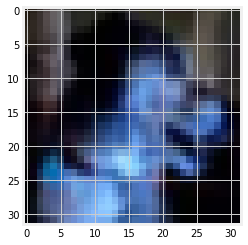

In [6]:
#Show image as picture
img = plt.imshow(x_train[index]) 
#Get image label
print('image label is:', y_train[index])

In [7]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#print class
print('The class of image is:', classification[y_train[index][0]]) 

The class of image is: dog


In [8]:
#convert the labels into set of 10 numbers to input into neural network
y_train_one = to_categorical(y_train)
y_test_one = to_categorical(y_test)

In [9]:
#print new labels
print(y_train_one)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [10]:
#Print the new label of selected image
print('new label is:', y_train_one[index])

new label is: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
#Normalize the pixel valuse of images in range between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train[index]

array([[[0.1254902 , 0.09803922, 0.0627451 ],
        [0.15294118, 0.1254902 , 0.10196078],
        [0.21176471, 0.18431373, 0.17254902],
        ...,
        [0.21568627, 0.21568627, 0.18039216],
        [0.16078431, 0.16470588, 0.13333333],
        [0.13333333, 0.14117647, 0.11372549]],

       [[0.14117647, 0.11372549, 0.07843137],
        [0.17647059, 0.14901961, 0.1254902 ],
        [0.22745098, 0.19607843, 0.18823529],
        ...,
        [0.20392157, 0.2       , 0.17254902],
        [0.16862745, 0.17254902, 0.14901961],
        [0.14509804, 0.14901961, 0.12941176]],

       [[0.16078431, 0.13333333, 0.09803922],
        [0.18431373, 0.15686275, 0.13333333],
        [0.22745098, 0.19607843, 0.18823529],
        ...,
        [0.18039216, 0.18039216, 0.15686275],
        [0.17254902, 0.17647059, 0.15686275],
        [0.15294118, 0.15686275, 0.14117647]],

       ...,

       [[0.        , 0.        , 0.01176471],
        [0.04313725, 0.06666667, 0.09411765],
        [0.2       , 0

In [13]:
#Creating the Model 
model = Sequential()

#Adding the convolution layers

#Adding first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape = (32, 32, 3)) )

#Adding a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding second convolution layer
model.add( Conv2D(32, (5,5), activation='relu'))

#Adding second pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Adding flattening layer
model.add(Flatten())

#Adding a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Adding dropout layer
model.add(Dropout(0.5))

#Adding a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Adding dropout layer
model.add(Dropout(0.5))

#Adding a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Adding a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [14]:
#Compile the model
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [15]:
#Training the model
hist = model.fit(x_train, y_train_one,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 54s 1ms/step - loss: 1.8136 - accuracy: 0.3208 - val_loss: 1.5045 - val_accuracy: 0.4446
Epoch 2/10
40000/40000 [==============================] - 54s 1ms/step - loss: 1.4554 - accuracy: 0.4654 - val_loss: 1.3658 - val_accuracy: 0.5000
Epoch 3/10
40000/40000 [==============================] - 54s 1ms/step - loss: 1.3066 - accuracy: 0.5259 - val_loss: 1.3094 - val_accuracy: 0.5232
Epoch 4/10
40000/40000 [==============================] - 53s 1ms/step - loss: 1.2143 - accuracy: 0.5636 - val_loss: 1.1356 - val_accuracy: 0.5921
Epoch 5/10
40000/40000 [==============================] - 53s 1ms/step - loss: 1.1231 - accuracy: 0.5966 - val_loss: 1.1483 - val_accuracy: 0.5985
Epoch 6/10
40000/40000 [==============================] - 53s 1ms/step - loss: 1.0534 - accuracy: 0.6254 - val_loss: 1.0250 - val_accuracy: 0.6383
Epoch 7/10
40000/40000 [==============================] - 53s 1ms/st

In [16]:
#Evaluate the model
model.evaluate(x_test, y_test_one)[1]

10000/10000 [==============================] - 5s 451us/step


0.680899977684021

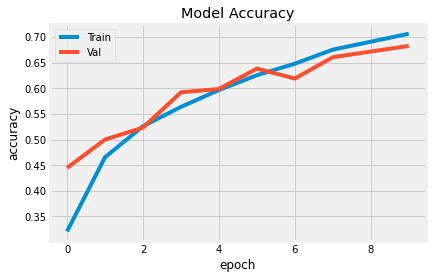

In [23]:
#visualization of the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

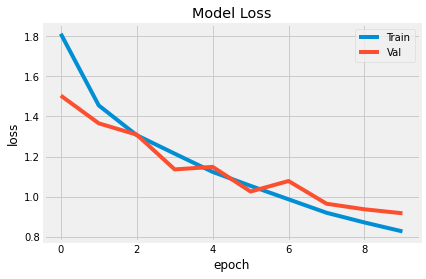

In [22]:
#Visualization of the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [55]:
#Testing the model
from google.colab import files
x = files.upload()

Saving dog.12.jpg to dog.12.jpg


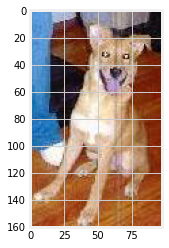

In [56]:
#Show the image
new_image = plt.imread('dog.12.jpg')
img = plt.imshow(new_image)

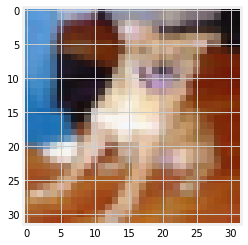

In [57]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

In [58]:
#Geting predictions from model
predictions = model.predict(np.array([resized_image]))

#Show the prediction
predictions

array([[5.9876003e-04, 6.4539476e-05, 5.3360462e-03, 3.3984640e-01,
        2.0890241e-03, 6.2342745e-01, 1.7082262e-03, 2.6017150e-02,
        4.5925600e-04, 4.5312158e-04]], dtype=float32)

In [59]:
#sorting the predictions
list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order
print(list_index)

[5, 3, 7, 2, 4, 6, 0, 8, 9, 1]


In [60]:
#Print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

dog : 62.34 %
cat : 33.98 %
horse : 2.6 %
bird : 0.53 %
deer : 0.21 %
